In [ ]:
import numpy as np
import matplotlib.pyplot as plt

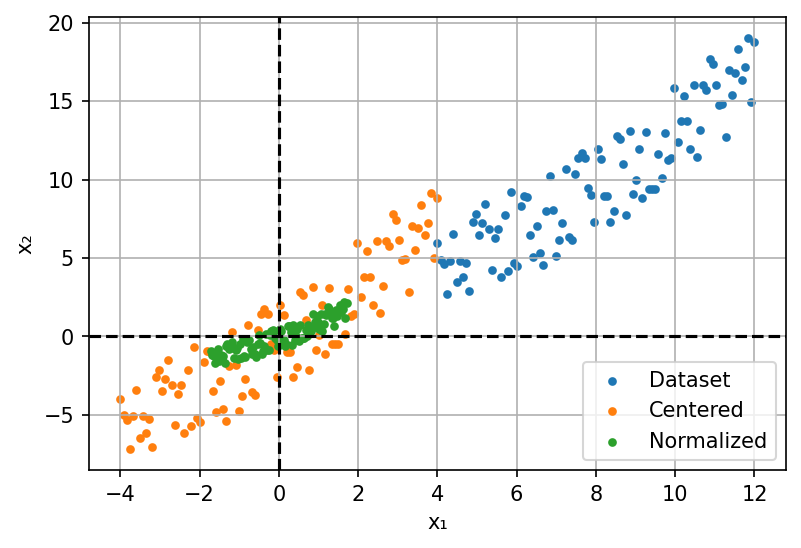

In [ ]:
# STANDARIZATION
plt.figure(dpi=150)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

s = 10

x = np.linspace(4,12,100)
y = 0.1*x**2 + np.random.random(size=x.shape[0])*np.max(x)*0.5
plt.scatter(x,y, label="Dataset", s=s)
my = np.mean(y)
stdy = y.std()
mx = np.mean(x)
stdx = x.std()
plt.scatter((x-mx),(y-my), label="Centered", s=s)
plt.scatter((x-mx)/stdx,(y-my)/stdy,label="Normalized", s=s)

plt.legend()
plt.grid()
plt.xlabel(u'x\u2081')
plt.ylabel(u'x\u2082')
plt.savefig("Normalization.png")

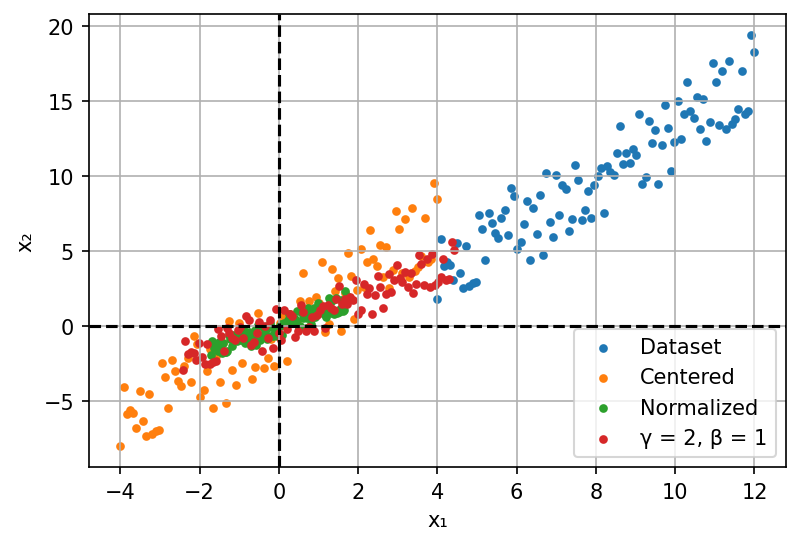

In [ ]:
# STANDARIZATION
plt.figure(dpi=150)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

s = 10

x = np.linspace(4,12,100)
y = 0.1*x**2 + np.random.random(size=x.shape[0])*np.max(x)*0.5
plt.scatter(x,y, label="Dataset", s=s)
my = np.mean(y)
stdy = y.std()
mx = np.mean(x)
stdx = x.std()
plt.scatter((x-mx),(y-my), label="Centered", s=s)
plt.scatter((x-mx)/stdx,(y-my)/stdy,label="Normalized", s=s)
gamma = 2
beta = 1
bnx = gamma * (x-mx)/stdx + beta
bny = gamma * (y-my)/stdy + beta
plt.scatter(bnx,bny,label="γ = 2, β = 1", s=s)


plt.legend(loc='lower right')
plt.grid()
plt.xlabel(u'x\u2081')
plt.ylabel(u'x\u2082')
plt.savefig("BN.png")

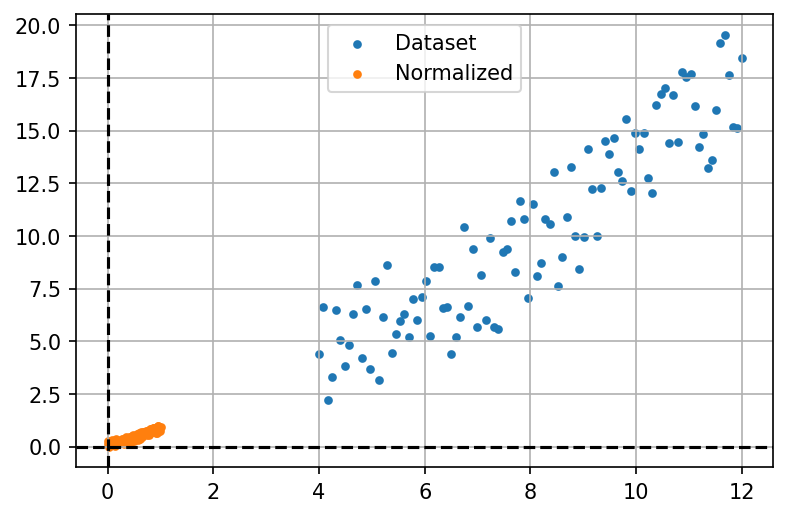

In [ ]:
# Normalize
plt.figure(dpi=150)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

s = 10

x = np.linspace(4,12,100)
y = 0.1*x**2 + np.random.random(size=x.shape[0])*np.max(x)*0.5
plt.scatter(x,y, label="Dataset", s=s)

x_max, x_min = x.max(), x.min()
y_max, y_min = y.max(), y.min()

x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)

plt.scatter(x,y, label="Normalized", s=s)

plt.legend()
plt.grid()

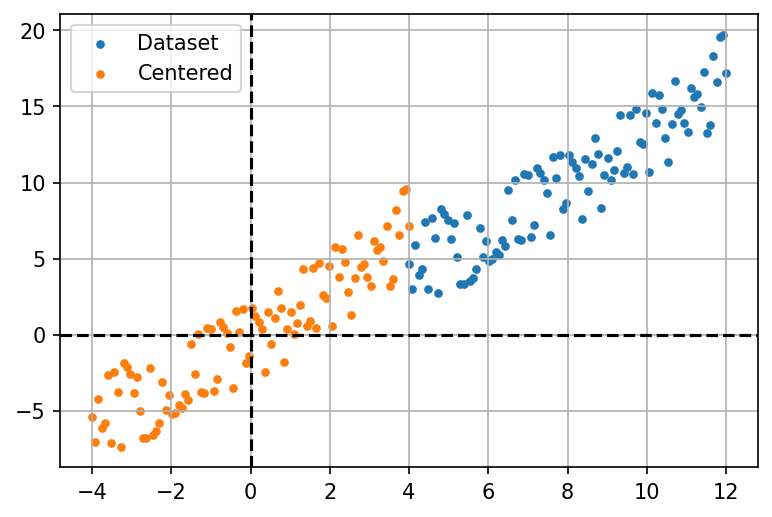

In [ ]:
# Centering
plt.figure(dpi=150)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

s = 10

x = np.linspace(4,12,100)
y = 0.1*x**2 + np.random.random(size=x.shape[0])*np.max(x)*0.5
plt.scatter(x,y, label="Dataset", s=s)

x = x - x.mean()
y = y - y.mean()

plt.scatter(x,y, label="Centered", s=s)

plt.legend()
plt.grid()

In [ ]:
import torch
x = torch.rand(64, 3, 28, 28)

In [ ]:
def BatchNorm(x, gamma, beta, eps=1e-5):
    # x: input features with shape [N, C, H, W]

    N, C, H, W = x.shape
    mean = torch.mean(input=x, dim=[0,2,3], keepdim=True)
    var = torch.var(input=x, dim=[0,2,3], keepdim=True)
    # mean, std shape : [1, C, 1, 1]

    x = (x - mean) / torch.sqrt(var + eps)
    
    return x * gamma + beta

In [ ]:
def LayerNorm(x, gamma, beta, eps=1e-5):
    # x: input features with shape [N, C, H, W]
    
    N, C, H, W = x.shape
    mean = torch.mean(input=x, dim=[1,2,3], keepdim=True)
    var = torch.var(input=x, dim=[1,2,3], keepdim=True)
    # mean, std shape: [N, 1, 1, 1]

    x = (x - mean) / torch.sqrt(var + eps)
    
    return x * gamma + beta

In [ ]:
def InstanceNorm(x, gamma, beta, eps=1e-5):
    # x: input features with shape [N, C, H, W]


    N, C, H, W = x.shape
    mean = torch.mean(input=x, dim=[2,3], keepdim=True)
    var = torch.var(input=x, dim=[2,3], keepdim=True)
    # mean, var  shape: [N, C, 1, 1]

    x = (x - mean) / torch.sqrt(var + eps)
    
    return x * gamma + beta

In [ ]:
def GroupNorm(x, gamma, beta, G, eps=1e-5):
    # x: input features with shape [N, C, H, W]
    # G : number of groups

    N, C, H, W = x.shape
    x = torch.reshape(input=x, shape=[N, G, C // G, H, W])
    mean = torch.mean(input=x, dim=[2,3,4], keepdim=True)
    var = torch.var(input=x, dim=[2,3,4], keepdim=True)
    # mean, std shape : [N, G, 1, 1, 1]

    x = (x - mean) / torch.sqrt(var + eps)

    x = torch.reshape(input=x, shape=[N, C, H, W])

    return x * gamma + beta

torch.Size([64, 1, 3, 28, 28])
torch.Size([64, 1, 1, 1, 1])


torch.Size([64, 3, 28, 28])

In [ ]:
w = torch.rand(32, 64, 3, 3)
def WeightStand(w, eps=1e-5):
    # w: input features with shape [Cin, Cout, kernel_size, kernel_size]

    mean = torch.mean(input=w, dim=[0,2,3], keepdim=True)
    var = torch.var(input=w, dim=[0,2,3], keepdim=True)
    # mean, std shape : [1, Cout, 1, 1]
    print(mean.shape)


    w = (w - mean) / torch.sqrt(var + eps)
    
    return w

WeightStand(w).shape

torch.Size([1, 64, 1, 1])


torch.Size([32, 64, 3, 3])